<a href="https://colab.research.google.com/github/jihyeon602/ETRI_lifelog_dataset/blob/main/ETRI_lifelog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Note: Set the file path associated with the dataset.
challenge2025_dataset_path = r"C:\Users\302-26\DACON_ETRL_lifelog\ETRI_lifelog_dataset\ch2025_data_items"  # <=== Modify as appropriate.

# EDA: Data items
- (1) mACStatus ; df_mACS
- (2) mActivity ; df_mACT
- (3) mAmbience ; df_mAMB
- (4) mBle      ; df_mBLE
- (5) mGps      ; df_mGPS
- (6) mLight    ; df_mLIGHT
- (7) mScreenStatus ; df_mSCRS
- (8) mUsageStats   ; df_mUSAS
- (9) mWifi         ; df_mWIFI
- (10) wHr          ; df_wHR
- (11) wLight       ; df_wLIGHT
- (12) wPedo        ; df_wPEDO

In [ ]:
# To print the list of data items
print("challenge 2025 dataset " + "="*5)
for file_name in sorted(os.listdir(challenge2025_dataset_path)):
    if file_name.endswith('.parquet'):
        print(file_name)

challenge 2025 dataset =====
ch2025_mACStatus.parquet
ch2025_mActivity.parquet
ch2025_mAmbience.parquet
ch2025_mBle.parquet
ch2025_mGps.parquet
ch2025_mLight.parquet
ch2025_mScreenStatus.parquet
ch2025_mUsageStats.parquet
ch2025_mWifi.parquet
ch2025_wHr.parquet
ch2025_wLight.parquet
ch2025_wPedo.parquet


### (1) mACStatus
: 현재 스마트폰 충전여부
- 0,1 이진분류

In [ ]:
data_item = "mACStatus"
df_mACS = pd.read_parquet(os.path.join(challenge2025_dataset_path, f"ch2025_{data_item}.parquet"))
df_mACS.info()
df_mACS.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939896 entries, 0 to 939895
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   subject_id  939896 non-null  object        
 1   timestamp   939896 non-null  datetime64[ns]
 2   m_charging  939896 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 21.5+ MB


,subject_id,timestamp,m_charging
0,id01,2024-06-26 12:03:00,0
1,id01,2024-06-26 12:04:00,0
2,id01,2024-06-26 12:05:00,0
3,id01,2024-06-26 12:06:00,0
4,id01,2024-06-26 12:07:00,0


In [ ]:
df_mACS.subject_id.unique()


array(['id01', 'id02', 'id03', 'id04', 'id05', 'id06', 'id07', 'id08',
       'id09', 'id10'], dtype=object)

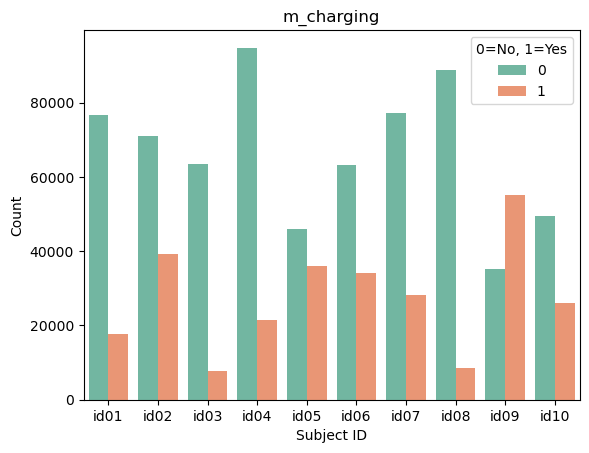

In [ ]:
fig = plt.plot(figsize = (8, 5))
sns.countplot(data=df_mACS, x= 'subject_id', hue='m_charging', palette='Set2')
plt.xlabel('Subject ID'); plt.ylabel('Count')
plt.title('m_charging')
plt.legend(title='0=No, 1=Yes')
plt.show()


### (2) mActivity
: Google Activity Recognition API를 기반으로 계산된 사용자의 활동 상태

- m_activity
  - 0: IN_VEHICLE(차량 탑승)
  - 1: ON_BICYCLE(자전거 탑승)
  - 2: ON_FOOT(이동중)
  - 3: STILL(정지)
  - 4: UNKNOWN(알수없음)
  - 5: TILTING(기울임, 각도 변경)
  - 7: WALKING(보행중)
  - 8: RUNNING(뛰는중)

In [ ]:
data_item = "mActivity"
df_mACT = pd.read_parquet(os.path.join(challenge2025_dataset_path, f"ch2025_{data_item}.parquet"))
df_mACT.info()
df_mACT.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961062 entries, 0 to 961061
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   subject_id  961062 non-null  object        
 1   timestamp   961062 non-null  datetime64[ns]
 2   m_activity  961062 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 22.0+ MB


,subject_id,timestamp,m_activity
0,id01,2024-06-26 12:03:00,4
1,id01,2024-06-26 12:04:00,0
2,id01,2024-06-26 12:05:00,0
3,id01,2024-06-26 12:06:00,0
4,id01,2024-06-26 12:07:00,0


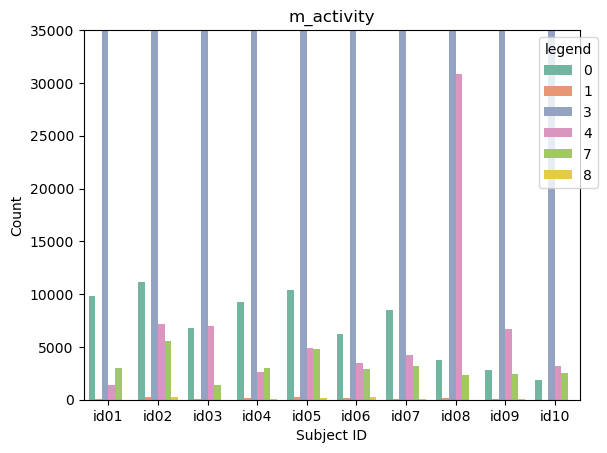

In [ ]:
fig = plt.plot(figsize = (6, 10))
sns.countplot(data=df_mACT, x= 'subject_id', hue='m_activity', palette='Set2')
plt.xlabel('Subject ID'); plt.ylabel('Count')
#plt.ylim(0, 35000)  #정지상태만 많음
plt.title('m_activity')
plt.legend(title='legend', bbox_to_anchor=(1.05, 1),loc = 'upper right')
plt.show()

- 정지>차량>알수없음>보행중>자전거 탑승 순
- id08의 측정되지 않은데이터 많음

### (3) mAmbience

스마트폰이 2분마다 자동으로 주변 소리를 인식하고,
인식된 소리 환경 라벨 10개와 각각의 확률을 기록한 데이터

- ambience_labels: 감지된 상위 10개의 소리 환경 라벨과 각 라벨에 대한 예측 확률 값 리스트

In [ ]:
data_item = "mAmbience"
df_mAMB = pd.read_parquet(os.path.join(challenge2025_dataset_path, f"ch2025_{data_item}.parquet"))
df_mAMB.info()
df_mAMB.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476577 entries, 0 to 476576
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   subject_id  476577 non-null  object        
 1   timestamp   476577 non-null  datetime64[ns]
 2   m_ambience  476577 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 10.9+ MB


,subject_id,timestamp,m_ambience
0,id01,2024-06-26 13:00:10,"[[Music, 0.30902618], [Vehicle, 0.081680894], ..."
1,id01,2024-06-26 13:02:10,"[[Music, 0.62307084], [Vehicle, 0.021118319], ..."
2,id01,2024-06-26 13:04:10,"[[Horse, 0.25209898], [Animal, 0.24263993], [C..."
3,id01,2024-06-26 13:06:10,"[[Speech, 0.93433166], [Inside, large room or ..."
4,id01,2024-06-26 13:08:10,"[[Speech, 0.8935082], [Inside, small room, 0.0..."


In [ ]:
df_mAMB.m_ambience[0] #상위 10개

array([array(['Music', '0.30902618'], dtype=object),
       array(['Vehicle', '0.081680894'], dtype=object),
       array(['Motor vehicle (road)', '0.04035286'], dtype=object),
       array(['Outside, urban or manmade', '0.037144363'], dtype=object),
       array(['Outside, rural or natural', '0.032663062'], dtype=object),
       array(['Car', '0.03199804'], dtype=object),
       array(['Speech', '0.029806137'], dtype=object),
       array(['Inside, large room or hall', '0.01684492'], dtype=object),
       array(['Truck', '0.016206821'], dtype=object),
       array(['Sound effect', '0.01591479'], dtype=object)], dtype=object)

- ['소리환경', '확률'] 구조

In [ ]:
label_list = []

for row in df_mAMB['m_ambience']:
    for item in row:
        label = item[0]  # ['소리환경', '확률'] 구조
        label_list.append(label)

unique_labels = set(label_list)

print("라벨 개수:", len(unique_labels))
print("라벨 목록:", sorted(unique_labels))

라벨 개수: 517
라벨 목록: ['A capella', 'Accelerating, revving, vroom', 'Accordion', 'Acoustic guitar', 'Afrobeat', 'Air brake', 'Air conditioning', 'Air horn, truck horn', 'Aircraft', 'Aircraft engine', 'Alarm', 'Alarm clock', 'Ambient music', 'Ambulance (siren)', 'Animal', 'Applause', 'Arrow', 'Artillery fire', 'Babbling', 'Baby cry, infant cry', 'Baby laughter', 'Background music', 'Bagpipes', 'Bang', 'Banjo', 'Bark', 'Basketball bounce', 'Bass drum', 'Bass guitar', 'Bathtub (filling or washing)', 'Beatboxing', 'Bee, wasp, etc.', 'Beep, bleep', 'Bell', 'Bellow', 'Belly laugh', 'Bicycle', 'Bicycle bell', 'Bird', 'Bird flight, flapping wings', 'Bird vocalization, bird call, bird song', 'Biting', 'Bleat', 'Blender', 'Bluegrass', 'Blues', 'Boat, Water vehicle', 'Boiling', 'Boing', 'Boom', 'Bouncing', 'Bow-wow', 'Bowed string instrument', 'Brass instrument', 'Breaking', 'Breathing', 'Burping, eructation', 'Burst, pop', 'Bus', 'Busy signal', 'Buzz', 'Buzzer', 'Cacophony', 'Camera', 'Canidae, dogs

C:\Users\302-26\AppData\Local\Temp\ipykernel_4848\2610968583.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_labels.values, y=top_labels.index, palette='Set2')


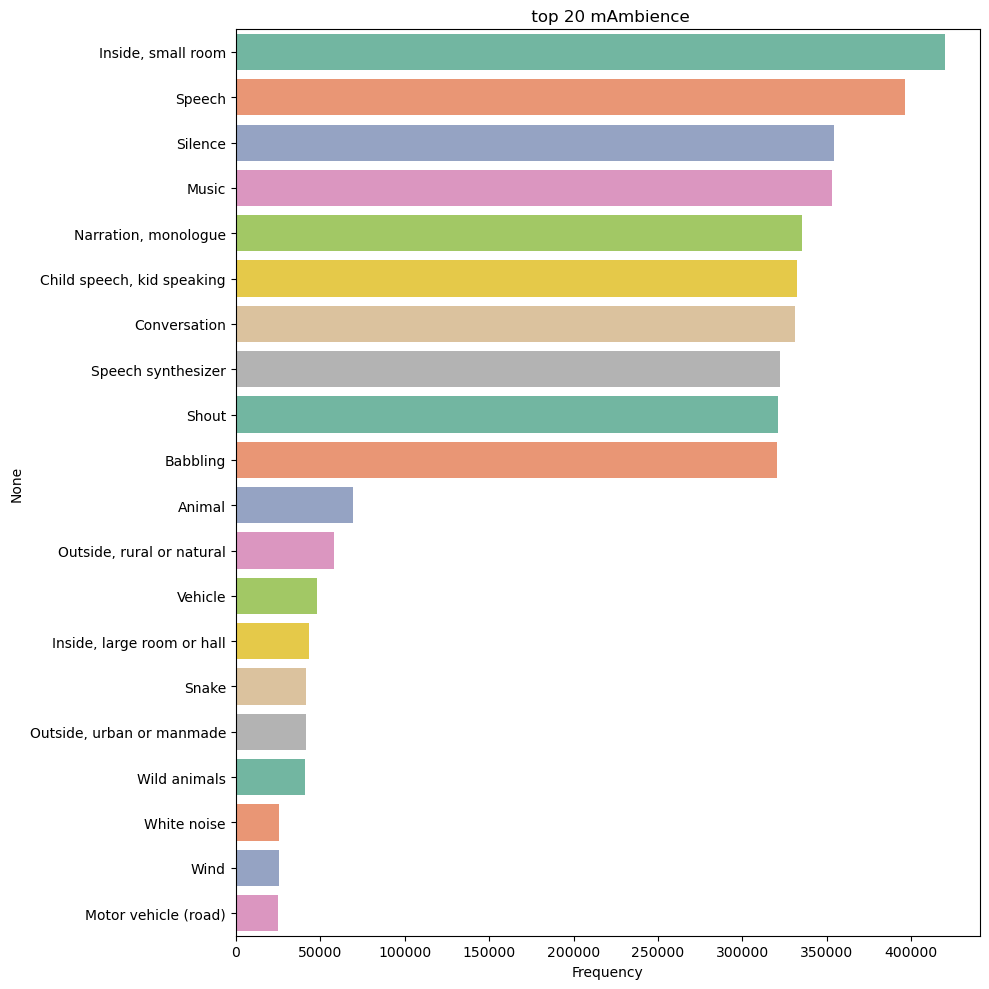

In [ ]:
label_series = pd.Series(label_list)
top_labels = label_series.value_counts().head(20)

plt.figure(figsize=(10, 10))
sns.barplot(x=top_labels.values, y=top_labels.index, palette='Set2')
plt.title(" top 20 mAmbience")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()

- 지민님꺼 추가

### (4) mBle
: 사용자의 주변에서 감지된 블루투스 기기 목록

- ❗블루투스 기기 많으면

-> 사람근접여부/활동 추정/실내,실외 예) 반복적인 블루투스 기기 패턴 = 특정 장소 유추

In [ ]:
data_item = "mBle"
df_mBEL = pd.read_parquet(os.path.join(challenge2025_dataset_path, f"ch2025_{data_item}.parquet"))
df_mBEL.info()
df_mBEL.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21830 entries, 0 to 21829
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   subject_id  21830 non-null  object        
 1   timestamp   21830 non-null  datetime64[ns]
 2   m_ble       21830 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 511.8+ KB


,subject_id,timestamp,m_ble
0,id01,2024-06-26 12:13:00,"[{'address': '00:15:7C:11:80:8D', 'device_clas..."
1,id01,2024-06-26 12:23:00,"[{'address': '0A:B1:26:4D:76:21', 'device_clas..."
2,id01,2024-06-26 12:33:00,"[{'address': '04:F5:AE:39:95:E0', 'device_clas..."
3,id01,2024-06-26 13:23:00,"[{'address': '06:C0:D2:6D:9F:69', 'device_clas..."
4,id01,2024-06-26 14:23:00,"[{'address': '10:2B:41:74:9F:B1', 'device_clas..."


In [ ]:
print(df_mBEL.m_ble[0])
print("기기개수:", len(df_mBEL.m_ble[0]))

[{'address': '00:15:7C:11:80:8D', 'device_class': '0', 'rssi': -82}
 {'address': '01:B1:D2:20:9E:3A', 'device_class': '0', 'rssi': -61}
 {'address': '04:33:1F:D9:C1:50', 'device_class': '0', 'rssi': -86}
 {'address': '06:5C:2D:BC:39:BE', 'device_class': '0', 'rssi': -75}
 {'address': '09:42:21:0D:AD:DF', 'device_class': '0', 'rssi': -70}
 {'address': '0B:66:0D:D5:9C:4A', 'device_class': '0', 'rssi': -89}
 {'address': '10:B5:88:E7:85:69', 'device_class': '0', 'rssi': -89}
 {'address': '13:F0:CA:3B:DB:EF', 'device_class': '0', 'rssi': -77}
 {'address': '1A:23:C0:8F:43:4D', 'device_class': '0', 'rssi': -66}
 {'address': '24:11:53:BB:62:89', 'device_class': '1796', 'rssi': -37}
 {'address': '24:2D:F0:EE:1E:D0', 'device_class': '0', 'rssi': -85}
 {'address': '26:0C:48:28:15:77', 'device_class': '0', 'rssi': -63}
 {'address': '27:C1:C0:8B:82:C9', 'device_class': '0', 'rssi': -88}
 {'address': '28:9C:11:73:39:05', 'device_class': '0', 'rssi': -30}
 {'address': '34:40:DE:35:F8:65', 'device_cla

### (5) mGps
: 스마트폰에서 수집된 GPS 좌표 정보
개인정보 보호를 위해 위도(latitude)와 경도(longitude)는 상대 좌표로 변환되어 저장


- 측정 빈도: 최대 분당 12회까지 측정됩니다. (즉, 약 5초마다 한 번)


- 위도와 경도가 모두 -1로 기록된 데이터는 제외

  → GPS 오류 또는 수신 실패를 의미하는 값으로 간주

- m_gps
  - altitude: 고도
  - latitude: 위도
  - longitude: 경도
  - speed: 속도

In [ ]:
data_item = "mGps"
df_GPS = pd.read_parquet(os.path.join(challenge2025_dataset_path, f"ch2025_{data_item}.parquet"))
df_GPS.info()
df_GPS.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800611 entries, 0 to 800610
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   subject_id  800611 non-null  object        
 1   timestamp   800611 non-null  datetime64[ns]
 2   m_gps       800611 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 18.3+ MB


,subject_id,timestamp,m_gps
0,id01,2024-06-26 12:03:00,"[{'altitude': 110.6, 'latitude': 0.2077385, 'l..."
1,id01,2024-06-26 12:04:00,"[{'altitude': 110.8, 'latitude': 0.2078068, 'l..."
2,id01,2024-06-26 12:05:00,"[{'altitude': 110.7, 'latitude': 0.2078214, 'l..."
3,id01,2024-06-26 12:06:00,"[{'altitude': 110.7, 'latitude': 0.2078395, 'l..."
4,id01,2024-06-26 12:07:00,"[{'altitude': 110.8, 'latitude': 0.2078478, 'l..."


In [ ]:
print(len(df_GPS.m_gps[0]), len(df_GPS.m_gps[1]), len(df_GPS.m_gps[100]))

11 11 12


### (6) mLight
: 스마트폰을 통해 측정된 주변의 밝기 수준
10분 마다 측정
- 조도의 단위 : lx(lux;럭스), 빛의 밝기를 수치로 나타냄
- 밝기 단위 구간 기반으로 분류 필요

In [ ]:
data_item = "mLight"
df_mLIGHT = pd.read_parquet(os.path.join(challenge2025_dataset_path, f"ch2025_{data_item}.parquet"))
df_mLIGHT.info()
df_mLIGHT.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96258 entries, 0 to 96257
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   subject_id  96258 non-null  object        
 1   timestamp   96258 non-null  datetime64[ns]
 2   m_light     96258 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.2+ MB


,subject_id,timestamp,m_light
0,id01,2024-06-26 12:03:00,534.0
1,id01,2024-06-26 12:13:00,846.0
2,id01,2024-06-26 12:23:00,826.0
3,id01,2024-06-26 12:33:00,851.0
4,id01,2024-06-26 12:43:00,428.0


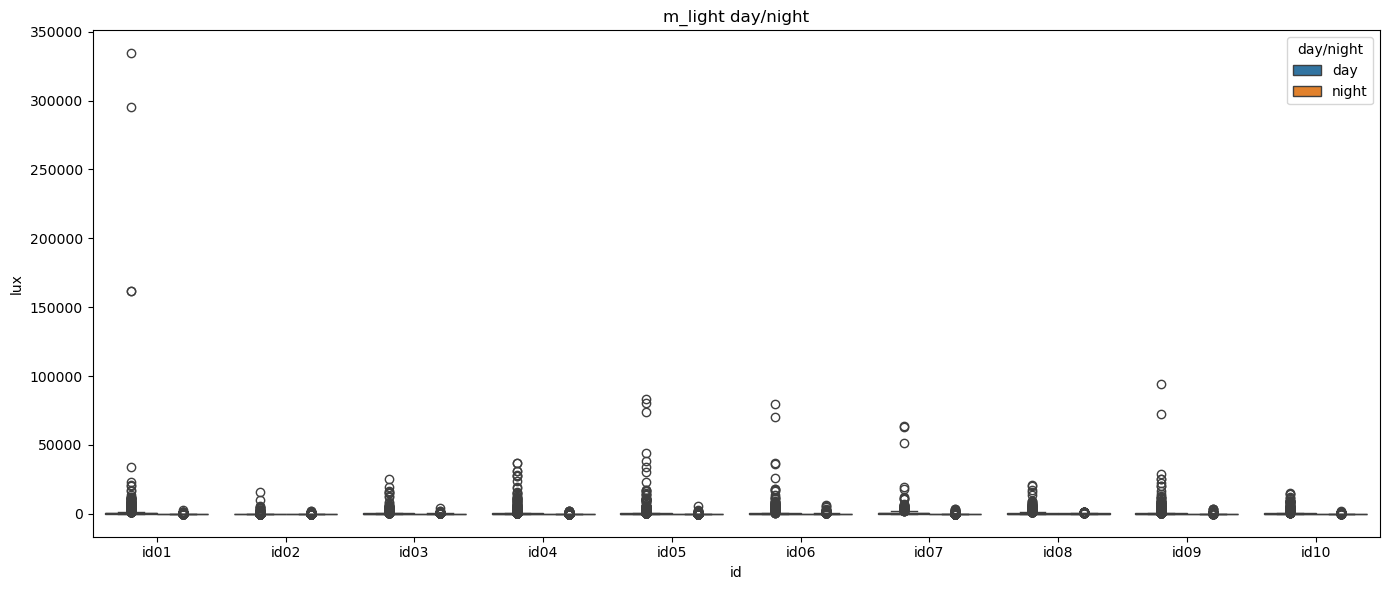

In [ ]:
df_mLIGHT['timestamp'] = pd.to_datetime(df_mLIGHT['timestamp'])

# 낮/밤 분류: 6시-18시 day, 나머지는 night
df_mLIGHT['time_of_day'] = df_mLIGHT['timestamp'].dt.hour.apply(lambda h: 'day' if 6 <= h < 18 else 'night')

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_mLIGHT, x='subject_id', y='m_light', hue='time_of_day')
plt.title('m_light day/night')
plt.xlabel('id'); plt.ylabel('lux')
plt.legend(title='day/night')
plt.tight_layout()
plt.show()

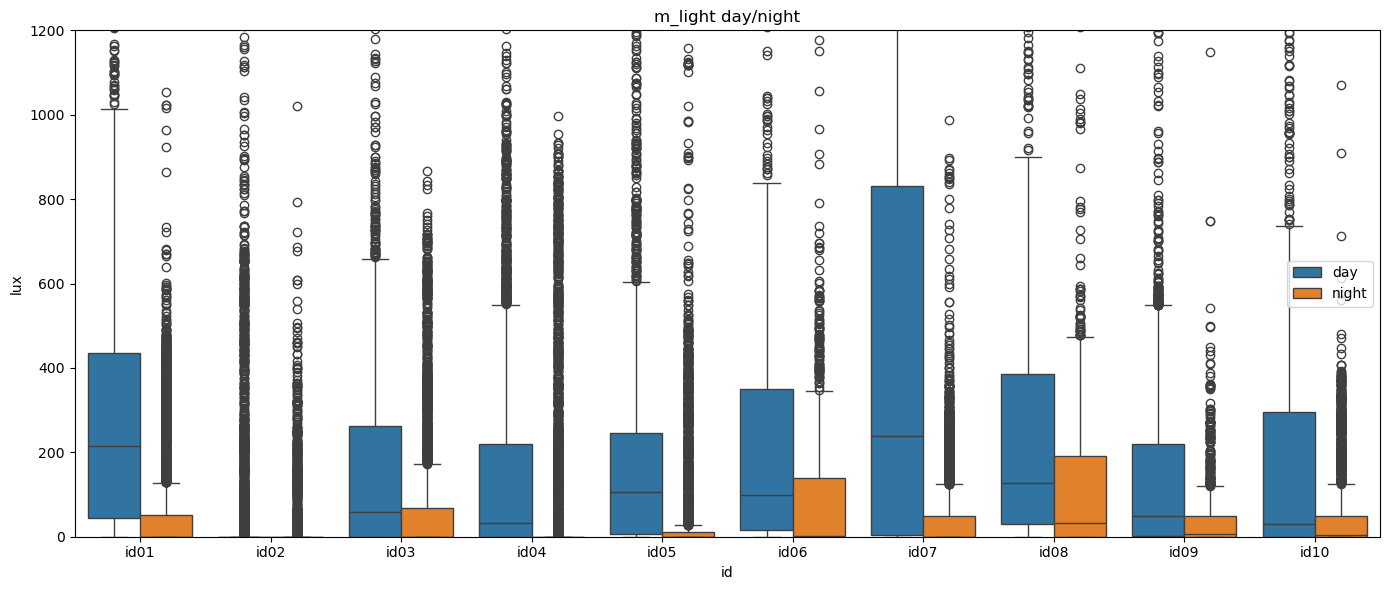

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_mLIGHT, x='subject_id', y='m_light', hue='time_of_day')
plt.title('m_light day/night')
plt.xlabel('id'); plt.ylabel('lux')
plt.legend()
plt.ylim(0, 1200)
plt.tight_layout()
plt.show()

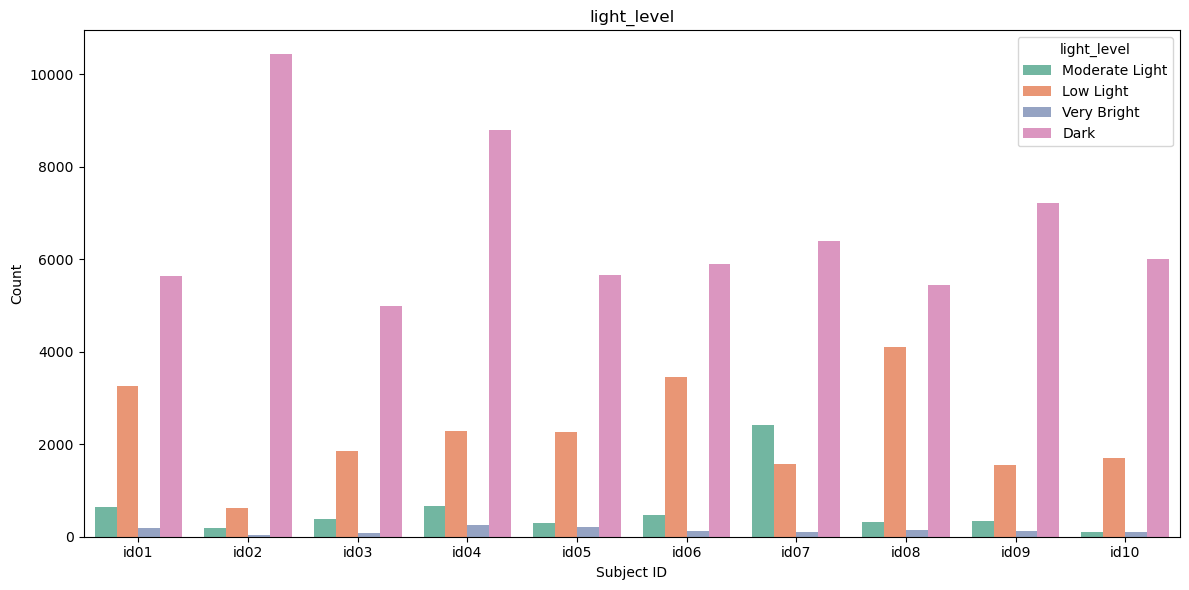

In [ ]:
# Lux Level Categorization
def categorize_lux(lux):
    if lux < 100:
        return 'Dark'
    elif lux < 500:
        return 'Low Light'
    elif lux < 1000:
        return 'Moderate Light'
    else:
        return 'Very Bright'

df_mLIGHT['light_level'] = df_mLIGHT['m_light'].apply(categorize_lux)


plt.figure(figsize=(12, 6))
sns.countplot(data=df_mLIGHT, x='subject_id', hue='light_level', palette='Set2')
plt.title('light_level')
plt.xlabel('Subject ID')
plt.ylabel('Count')
plt.legend(title='light_level')
plt.tight_layout()
plt.show()

- lux 분포가 매우 큼
- DAY/NIGHT 의 lux 차이가 극명
- 빈도수는 dark>low light>moderate light>very bright 순

### (7) mScreenStatus
: 스마트폰 화면이 켜져 있는지 여부를 나타냅니다.
- 이진분류(0,1)


In [ ]:
data_item = "mScreenStatus"
df_SCRS = pd.read_parquet(os.path.join(challenge2025_dataset_path, f"ch2025_{data_item}.parquet"))
df_SCRS.info()
df_SCRS.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939653 entries, 0 to 939652
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   subject_id    939653 non-null  object        
 1   timestamp     939653 non-null  datetime64[ns]
 2   m_screen_use  939653 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 21.5+ MB


,subject_id,timestamp,m_screen_use
0,id01,2024-06-26 12:03:00,0
1,id01,2024-06-26 12:04:00,0
2,id01,2024-06-26 12:05:00,0
3,id01,2024-06-26 12:06:00,0
4,id01,2024-06-26 12:07:00,0


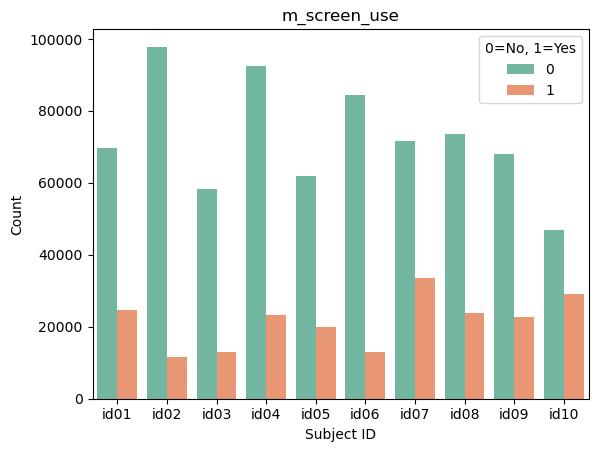

In [ ]:
fig = plt.plot(figsize = (8, 5))
sns.countplot(data=df_SCRS, x= 'subject_id', hue='m_screen_use', palette='Set2')
plt.xlabel('Subject ID'); plt.ylabel('Count')
plt.title('m_screen_use')
plt.legend(title='0=No, 1=Yes')
plt.show()

- 아침/오후/밤/새벽으로 나눠서 휴대폰 사용시간을 분류(6시간씩)

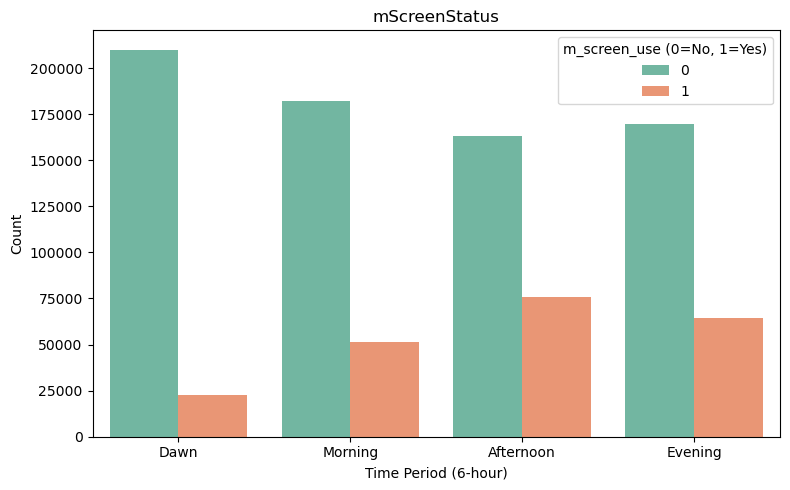

In [ ]:
def time_period(hour):
    if 0 <= hour < 6:
        return 'Dawn'    #새벽
    elif 6 <= hour < 12:
        return 'Morning'  #아침
    elif 12 <= hour < 18:
        return 'Afternoon' #오후
    else:
        return 'Evening'  #밤

df_SCRS['hour'] = pd.to_datetime(df_SCRS['timestamp']).dt.hour
df_SCRS['time_period'] = df_SCRS['hour'].apply(time_period)


plt.figure(figsize=(8, 5))
sns.countplot(data=df_SCRS, x='time_period', hue='m_screen_use', palette='Set2', order=['Dawn', 'Morning', 'Afternoon', 'Evening'])
plt.xlabel('Time Period (6-hour)')
plt.ylabel('Count')
plt.title('mScreenStatus')
plt.legend(title='m_screen_use (0=No, 1=Yes)')
plt.tight_layout()
plt.show()

### (8) mUsageStats
: 어떤 앱이 얼마 동안 사용되었는지를 나타내는 스마트폰 사용 통계
- 10분마다 측정
- m_usage_stats: 앱 이름과 사용 시간이 포함된 리스트 (앱 총 586개)

In [ ]:
data_item = "mUsageStats"
df_mUSAS = pd.read_parquet(os.path.join(challenge2025_dataset_path, f"ch2025_{data_item}.parquet"))
df_mUSAS.info()
print(df_mUSAS.head())

unique_apps = set()

# m_usage_stats 열에서 앱 이름 추출
for row in df_mUSAS['m_usage_stats'].dropna():
    for app_dict in row:
        if 'app_name' in app_dict:
            app_name = app_dict['app_name'].strip()
            unique_apps.add(app_name)

print(f"\n 총 고유 앱 수: {len(unique_apps)}개")
print(f" 예시 앱 목록 (상위 10개): {sorted(list(unique_apps))[:10]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45197 entries, 0 to 45196
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   subject_id     45197 non-null  object        
 1   timestamp      45197 non-null  datetime64[ns]
 2   m_usage_stats  45197 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.0+ MB
  subject_id           timestamp  \
0       id01 2024-06-26 13:00:00   
1       id01 2024-06-26 13:10:00   
2       id01 2024-06-26 13:20:00   
3       id01 2024-06-26 13:30:00   
4       id01 2024-06-26 13:50:00   

                                       m_usage_stats  
0  [{'app_name': ' 캐시워크', 'total_time': 69}, {'ap...  
1  [{'app_name': '통화', 'total_time': 26419}, {'ap...  
2  [{'app_name': '메시지', 'total_time': 388651}, {'...  
3  [{'app_name': '메시지', 'total_time': 211633}, {'...  
4  [{'app_name': '카카오톡', 'total_time': 35446}, {'...  

 총 고유 앱 수: 586개
 예시 앱 목록 (상위 1

C:\Users\302-26\AppData\Local\Temp\ipykernel_4848\4085517414.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='app_name', x='count', data=df_top_apps, palette='Set3')
C:\Users\302-26\AppData\Local\Temp\ipykernel_4848\4085517414.py:26: UserWarning: Glyph 10013 (\N{LATIN CROSS}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\302-26\AppData\Local\Temp\ipykernel_4848\4085517414.py:26: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\302-26\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10013 (\N{LATIN CROSS}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\302-26\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) miss

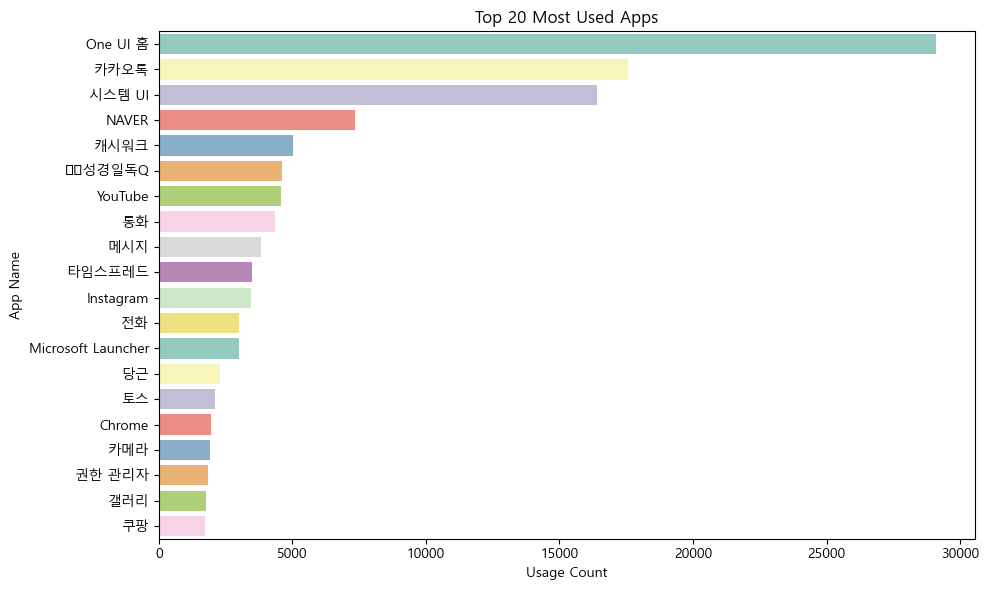

In [ ]:
import os
from collections import Counter

app_names = []

for row in df_mUSAS['m_usage_stats'].dropna():
    for app_dict in row:
        if 'app_name' in app_dict:
            app_name = app_dict['app_name'].strip()
            app_names.append(app_name)

# 앱 사용 횟수 집계
app_counts = Counter(app_names)
top_20_apps = app_counts.most_common(20)

# DataFrame으로 변환
df_top_apps = pd.DataFrame(top_20_apps, columns=['app_name', 'count'])

# 시각화
plt.figure(figsize=(10, 6))
plt.rc('font', family='Malgun Gothic')
sns.barplot(y='app_name', x='count', data=df_top_apps, palette='Set3')
plt.title('Top 20 Most Used Apps')
plt.xlabel('Usage Count')
plt.ylabel('App Name')
plt.tight_layout()
plt.show()

- 앱 카테고리별로 묶어서 분류하기

### (9) mWifi

: 사용자의 주변에서 감지된 와이파이 기기 목록입니다.
- m_wifi: 감지된 와이파이수가 많음 다다름
- ❗와이파이 감지 기기가 많으면

-> 사람많은곳/도시/실내/움직임적음 등등의 요소임

In [ ]:
data_item = "mWifi"
df_mWIFI = pd.read_parquet(os.path.join(challenge2025_dataset_path, f"ch2025_{data_item}.parquet"))
df_mWIFI.info()
print(df_mWIFI.head(10))
print(len(df_mWIFI.m_wifi[0])) #43

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76336 entries, 0 to 76335
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   subject_id  76336 non-null  object        
 1   timestamp   76336 non-null  datetime64[ns]
 2   m_wifi      76336 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB
  subject_id           timestamp  \
0       id01 2024-06-26 12:03:00   
1       id01 2024-06-26 12:13:00   
2       id01 2024-06-26 12:23:00   
3       id01 2024-06-26 12:33:00   
4       id01 2024-06-26 12:43:00   
5       id01 2024-06-26 12:53:00   
6       id01 2024-06-26 13:03:00   
7       id01 2024-06-26 13:13:00   
8       id01 2024-06-26 13:23:00   
9       id01 2024-06-26 13:33:00   

                                              m_wifi  
0  [{'bssid': 'a0:0f:37:9a:5d:8b', 'rssi': -78}, ...  
1  [{'bssid': 'a0:0f:37:9a:5d:8b', 'rssi': -79}, ...  
2  [{'bssid': '10:e3:c7:0a:74:d

----------------------
### w~ 항목(10,11,12)은 건강 및 지속적인 운동량 체크로 생각

### (10) wHr
: 스마트워치로 기록된 심박수 데이터(갤럭시 워치)
- 최대 분당 60회까지 기록 = 1초에 한번
- heat_rate: 측정된 심박수 값의 리스트

In [ ]:
data_item = "wHr"
df_data = pd.read_parquet(os.path.join(challenge2025_dataset_path, f"ch2025_{data_item}.parquet"))
df_data.info()
df_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382918 entries, 0 to 382917
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   subject_id  382918 non-null  object        
 1   timestamp   382918 non-null  datetime64[ns]
 2   heart_rate  382918 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 8.8+ MB


,subject_id,timestamp,heart_rate
0,id01,2024-06-26 12:23:00,"[134, 134, 135, 133, 134, 135, 134, 135, 134, ..."
1,id01,2024-06-26 12:24:00,"[123, 122, 121, 120, 121, 121, 120, 118, 119, ..."
2,id01,2024-06-26 12:25:00,"[120, 119, 117, 116, 119, 121, 123, 123, 121, ..."
3,id01,2024-06-26 12:26:00,"[125, 124, 124, 124, 125, 124, 124, 123, 123, ..."
4,id01,2024-06-26 12:27:00,"[116, 116, 117, 118, 116, 116, 116, 117, 115, ..."


### (11) wLight

: 스마트워치로 측정된 주변 밝기 수준
- 10분 마다 측정
- 조도의 단위 : lx(lux;럭스), 빛의 밝기를 수치로 나타냄
- 밝기 단위 구간 기반으로 분류 필요

❗ m_Light랑 차이 확인 요망 (측정기술 차이, 시계열, 어떤기기가 더 밝기 측정이 잘될것인가?)

In [ ]:
data_item = "wLight"
df_data = pd.read_parquet(os.path.join(challenge2025_dataset_path, f"ch2025_{data_item}.parquet"))
df_data.info()
df_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633741 entries, 0 to 633740
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   subject_id  633741 non-null  object        
 1   timestamp   633741 non-null  datetime64[ns]
 2   w_light     633741 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 14.5+ MB


,subject_id,timestamp,w_light
0,id01,2024-06-26 12:17:00,633.0
1,id01,2024-06-26 12:18:00,483.0
2,id01,2024-06-26 12:19:00,541.0
3,id01,2024-06-26 12:20:00,547.0
4,id01,2024-06-26 12:21:00,547.0


### (12) wPedo

: 스마트워치로 기록된 걸음 수 데이터

- 건강지표(걸음수보단 운동을 하는지 안하는지 정도로 생각)

- ❗mActivity의 (7)walking 이랑 데이터 정확한지 확인
- ❗mGPS: 걸음수-GPS상의 위치 확인

- step_frequency (단위시간당 보행 수)
- distance
- speed
- step
  - ❌running_step / walking_step : 전부 0 둘다 열제거
- burned_calories (칼로리 소비량)

In [ ]:
data_item = "wPedo"
df_data = pd.read_parquet(os.path.join(challenge2025_dataset_path, f"ch2025_{data_item}.parquet"))
df_data.info()
df_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748100 entries, 0 to 748099
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   subject_id       748100 non-null  object        
 1   timestamp        748100 non-null  datetime64[ns]
 2   step             748100 non-null  int64         
 3   step_frequency   748100 non-null  float64       
 4   running_step     748100 non-null  int64         
 5   walking_step     748100 non-null  int64         
 6   distance         748100 non-null  float64       
 7   speed            748100 non-null  float64       
 8   burned_calories  748100 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 51.4+ MB


,subject_id,timestamp,step,step_frequency,running_step,walking_step,distance,speed,burned_calories
0,id01,2024-06-26 12:09:00,10,0.166667,0,0,8.33,0.138833,0.0
1,id01,2024-06-26 12:10:00,0,0.000000,0,0,0.00,0.000000,0.0
2,id01,2024-06-26 12:11:00,0,0.000000,0,0,0.00,0.000000,0.0
3,id01,2024-06-26 12:12:00,0,0.000000,0,0,0.00,0.000000,0.0
4,id01,2024-06-26 12:13:00,0,0.000000,0,0,0.00,0.000000,0.0


In [ ]:
#STEP이 0이 아니면서 running walking도 0이 아닌 경우가 없다 뭐지
a = df_data[(df_data["step"] != 0) & ((df_data["running_step"] != 0) | (df_data["walking_step"] != 0))]
a

,subject_id,timestamp,step,step_frequency,running_step,walking_step,distance,speed,burned_calories


In [ ]:
#결론: 제거하는 열임
print(df_data["running_step"].unique())
print(df_data["walking_step"].unique())
print(df_data["step"].unique())

[0]
[0]
[ 10   0  12  17 109  89  97  80  26  32 110  22  23  54  47  39  33  13
  18  34  38  31  20  60  69  14  11  59  90  86 101  53 104  68  45  36
 119  35  16  37  65  70  67  57  56  30  27   6  98  79  21  61  42  52
   3   9  46  48  78   2  40  19  85  63  43   1  29  81  96  44  62  50
  25  51  15  92  94  41  58 112 115 117 116  72 113 106  73  87  49  91
  88 131  64   5 108  66   7  24  75  55   8  74 105  95 120 118   4  28
  83 111 151 124 172  76 126 122 121 107 102 138 103  99 100 114  82 198
 129  93  77 130 227 222  84 201 128  71 191 132 171 197 127 165 146 145
 134 123 133 154 136 135 160 166 215 185 179 174 167 228 205 125 181 177
 281 258 169 238 196 142 150 143 139 199 195 173 168 178 202 211 158 188
 157 140 182 184 175 152 156 203 194 163 162 144 141 137 159 176 147 149
 155 186 170 153 180 148 183 192 207 204 200 190 221 187 212 235 234 224
 208 317 237 217 164 161 260 232 216]
